In [160]:
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi.newsapi_client import NewsApiClient
from datetime import date, datetime, timedelta
%matplotlib inline

In [161]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [162]:
# Load .env enviroment variables
load_dotenv()
# Read your api key environment variable
api_key = os.getenv("NEWS_API_KEY")

In [163]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [164]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Bitcoin: {bitcoin_headlines['totalResults']}")

# Show sample article
bitcoin_headlines["articles"][0]


Total articles about Bitcoin: 3396


{'source': {'id': None, 'name': 'Gizmodo.com'},
 'author': 'Tom McKay',
 'title': 'God Help Us, the Winklevoss Twins Are Co-Producing a Movie About Their Bitcoin Journey',
 'description': 'The Winklevoss twins—the brothers Mark Zuckerberg allegedly stole the idea for Facebook from—are making a movie about themselves, Deadline reported this week. If that doesn’t seem masturbatory enough, rejoice: said film is about how they amassed a net wealth …',
 'url': 'https://gizmodo.com/god-help-us-the-winklevoss-twins-are-co-producing-a-mo-1843973511',
 'urlToImage': 'https://i.kinja-img.com/gawker-media/image/upload/c_fill,f_auto,fl_progressive,g_center,h_675,pg_1,q_80,w_1200/iujekjzgrttsevxxzbop.jpg',
 'publishedAt': '2020-06-09T23:45:00Z',
 'content': 'The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars]'}

In [165]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size=100,
    sort_by="relevancy"
)

# Print total articles
print(f"Total articles about Ethereum: {ethereum_headlines['totalResults']}")

# Show sample article
ethereum_headlines["articles"][0]

Total articles about Ethereum: 945


{'source': {'id': 'techcrunch', 'name': 'TechCrunch'},
 'author': 'Henry Pickavet',
 'title': 'Crypto Startup School: How to build projects and keep them safe',
 'description': 'Week five of a16z’s Crypto Startup School gets into the inner workings of crypto projects, with a focus on security and project development from the front lines.',
 'url': 'http://techcrunch.com/2020/06/17/crypto-startup-school-how-to-build-projects-and-keep-them-safe/',
 'urlToImage': 'https://techcrunch.com/wp-content/uploads/2020/06/GettyImages-1168971517.jpg?w=600',
 'publishedAt': '2020-06-17T19:00:35Z',
 'content': 'Editor’s note:Andreessen HorowitzsCrypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+3009 chars]'}

In [166]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for article in bitcoin_headlines["articles"]:
    try:
        text_bc = article["content"]
        date = article["publishedAt"][:10]
        #polarity score
        sentiment = analyzer.polarity_scores(text_bc)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text_bc,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Compound", "Negative", "Neutral", "Positive", "text"]
bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,Date,Compound,Negative,Neutral,Positive,text
0,2020-06-09,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...
1,2020-06-04,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...
2,2020-05-28,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...
3,2020-06-02,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...
4,2020-05-25,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...


In [167]:
# Create the ethereum sentiment scores DataFrame
ethereum_sentiments = []

for article in ethereum_headlines["articles"]:
    try:
        text_eth = article["content"]
        date = article["publishedAt"][:10]
        #polarity score
        sentiment = analyzer.polarity_scores(text_eth)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text_eth,
            "Date": date,
            "Compound": compound,
            "Positive": pos,
            "Negative": neg,
            "Neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["Date", "Compound", "Negative", "Neutral", "Positive", "text"]
ethereum_df = ethereum_df[cols]

ethereum_df.head()

,Date,Compound,Negative,Neutral,Positive,text
0,2020-06-17,0.0000,0.000,1.000,0.000,Editor’s note:Andreessen HorowitzsCrypto Start...
1,2020-06-08,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...
2,2020-06-03,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...
3,2020-06-15,0.0000,0.000,1.000,0.000,"Akron, Ohio, the hometown of LeBron James and ..."
4,2020-05-24,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou..."


In [168]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Negative,Neutral,Positive
count,95.000000,95.000000,95.000000,95.000000
mean,0.146303,0.033716,0.900253,0.066063
std,0.380498,0.053485,0.079021,0.063395
min,-0.817600,0.000000,0.618000,0.000000
25%,-0.111050,0.000000,0.858500,0.000000
50%,0.177900,0.000000,0.910000,0.070000
75%,0.507000,0.064500,0.947000,0.090000
max,0.919800,0.215000,1.000000,0.335000


In [169]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Negative,Neutral,Positive
count,96.000000,96.000000,96.000000,96.000000
mean,0.241294,0.032146,0.881594,0.086240
std,0.384663,0.051071,0.078967,0.070563
min,-0.807400,0.000000,0.665000,0.000000
25%,0.000000,0.000000,0.824250,0.000000
50%,0.303100,0.000000,0.873000,0.087000
75%,0.514625,0.056000,0.936000,0.130750
max,0.919800,0.223000,1.000000,0.335000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had the highest mean positive score at .083

Q: Which coin had the highest compound score?

A: Both Ethereum and Bitcoin had the same highest compound score at 0.9198

Q. Which coin had the highest positive score?

A: Both Ethereum and Bitcoin had the same highest positive score at 0.335

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [170]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re
lemmatizer = WordNetLemmatizer()

In [171]:
# Expand the default stopwords list if necessary

In [172]:
# Complete the tokenizer function
def tokenizer(text_bc):
    """Tokenizes text."""
    
    # Create a list of the words
    sw = set(stopwords.words('english'))
    # Convert the words to lowercase
    regex = re.compile("[^a-zA-Z ]")
    # Remove the punctuation
    re_clean = regex.sub('', text)
    # Remove the stop words
    words = word_tokenize(re_clean)
    # Lemmatize Words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw]
    return tokens

In [173]:
# Create a new tokens column for bitcoin
bitcoin_tokens = []
for text in bitcoin_df['text']:
    bitcoin_tokens.append(tokenizer(text))
    
bitcoin_tokens_df = pd.DataFrame(
    {"tokens": bitcoin_tokens})   

# Merge dataframes
bitcoin_final_df = bitcoin_df.join(bitcoin_tokens_df)
bitcoin_final_df

,Date,Compound,Negative,Neutral,Positive,text,tokens
0,2020-06-09,0.0000,0.000,1.000,0.000,The Winklevoss twinsthe brothers Mark Zuckerbe...,"[winklevoss, twinsthe, brother, mark, zuckerbe..."
1,2020-06-04,-0.3464,0.134,0.819,0.046,If youre planning to do some protesting and yo...,"[youre, planning, protesting, dont, want, risk..."
2,2020-05-28,-0.2755,0.070,0.930,0.000,Reuters\r\n<ul><li>Goldman Sachs gave five rea...,"[reutersulligoldman, sachs, gave, five, reason..."
3,2020-06-02,0.0000,0.000,1.000,0.000,<ul><li>Famed investor Michael Novogratz tweet...,"[ullifamed, investor, michael, novogratz, twee..."
4,2020-05-25,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
...,...,...,...,...,...,...,...
90,2020-05-26,0.3400,0.000,0.924,0.076,One of Bitcoins oldest mining companies is now...,"[one, bitcoins, oldest, mining, company, givin..."
91,2020-05-21,0.3818,0.000,0.927,0.073,The bitcoin community was alive with speculati...,"[bitcoin, community, wa, alive, speculation, y..."
92,2020-06-20,0.0000,0.000,1.000,0.000,Could the U.S. government confiscate all bitco...,"[could, us, government, confiscate, bitcoin, s..."
93,2020-06-16,0.5719,0.000,0.865,0.135,Prominent investors and analysts in the indust...,"[prominent, investor, analyst, industry, expec..."


In [174]:
# Create a new tokens column for ethereum
tokenizer(text_eth)

ethereum_tokens = []
for text in ethereum_df['text']:
    ethereum_tokens.append(tokenizer(text))
    
ethereum_tokens_df = pd.DataFrame(
    {"tokens": etherium_tokens})   

# Merge dataframes
ethereum_final_df = ethereum_df.join(etherium_tokens_df)
ethereum_final_df

,Date,Compound,Negative,Neutral,Positive,text,tokens
0,2020-06-17,0.0000,0.000,1.000,0.000,Editor’s note:Andreessen HorowitzsCrypto Start...,"[editors, noteandreessen, horowitzscrypto, sta..."
1,2020-06-08,0.5070,0.000,0.910,0.090,Our robot colleague Satoshi Nakaboto writes ab...,"[robot, colleague, satoshi, nakaboto, writes, ..."
2,2020-06-03,0.0000,0.000,1.000,0.000,For developers looking to quickly build identi...,"[developer, looking, quickly, build, identity,..."
3,2020-06-15,0.0000,0.000,1.000,0.000,"Akron, Ohio, the hometown of LeBron James and ...","[akron, ohio, hometown, lebron, james, seat, u..."
4,2020-05-24,-0.4457,0.086,0.882,0.031,"Some open-source groups, such as The Linux Fou...","[opensource, group, linux, foundation, deal, o..."
...,...,...,...,...,...,...,...
91,2020-05-29,0.0000,0.000,1.000,0.000,Yahoo fait partie de Verizon Media. Cliquez su...,"[yahoo, fait, partie, de, verizonmedia, clique..."
92,2020-06-10,-0.7269,0.179,0.821,0.000,The Russian economy ministry is pushing back a...,"[russian, economy, ministry, pushing, back, na..."
93,2020-06-15,0.7351,0.000,0.795,0.205,Top Shelf\r\nView From the BanksIn an investor...,"[top, shelfview, banksin, investor, note, jpmo..."
94,2020-06-04,0.6124,0.000,0.853,0.147,Galaxy Digital is a digital asset merchant ban...,"[galaxy, digital, digital, asset, merchant, ba..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [175]:
from collections import Counter
from nltk import ngrams

In [176]:
# Generate the Bitcoin N-grams where N=2
bitcoin_grams = []
for i in bitcoin_final_df['tokens']:
    bitcoin_grams+= i
ngrams_bitcoin=Counter(ngrams(bitcoin_grams, n=2))
ngrams_bitcoin.most_common(10)

[(('satoshi', 'nakaboto'), 38),
 (('char', 'robot'), 19),
 (('robot', 'colleague'), 19),
 (('colleague', 'satoshi'), 19),
 (('nakaboto', 'writes'), 19),
 (('writes', 'bitcoin'), 19),
 (('bitcoin', 'btc'), 19),
 (('every', 'fucking'), 19),
 (('fucking', 'daywelcome'), 19),
 (('daywelcome', 'another'), 19)]

In [177]:
# Generate the Ethereum N-grams where N=2
ethereum_grams = []
for i in ethereum_final_df['tokens']:
    ethereum_grams+= i
ngrams_ethereum=Counter(ngrams(ethereum_grams, n=2))
ngrams_ethereum.most_common(10)

[(('char', 'day'), 15),
 (('day', 'aheadethereum'), 15),
 (('aheadethereum', 'would'), 15),
 (('would', 'need'), 15),
 (('first', 'major'), 15),
 (('major', 'resistance'), 15),
 (('resistance', 'level'), 15),
 (('broader', 'market'), 15),
 (('market', 'would'), 15),
 (('would', 'needed'), 15)]

In [178]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [179]:
# Get the top 10 words for Bitcoin
token_count(ngrams_bitcoin, N=10)

[(('satoshi', 'nakaboto'), 38),
 (('char', 'robot'), 19),
 (('robot', 'colleague'), 19),
 (('colleague', 'satoshi'), 19),
 (('nakaboto', 'writes'), 19),
 (('writes', 'bitcoin'), 19),
 (('bitcoin', 'btc'), 19),
 (('every', 'fucking'), 19),
 (('fucking', 'daywelcome'), 19),
 (('daywelcome', 'another'), 19)]

In [180]:
# Get the top 10 words for Ethereum
token_count(ngrams_ethereum, N=10)

[(('char', 'day'), 15),
 (('day', 'aheadethereum'), 15),
 (('aheadethereum', 'would'), 15),
 (('would', 'need'), 15),
 (('first', 'major'), 15),
 (('major', 'resistance'), 15),
 (('resistance', 'level'), 15),
 (('broader', 'market'), 15),
 (('market', 'would'), 15),
 (('would', 'needed'), 15)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [181]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

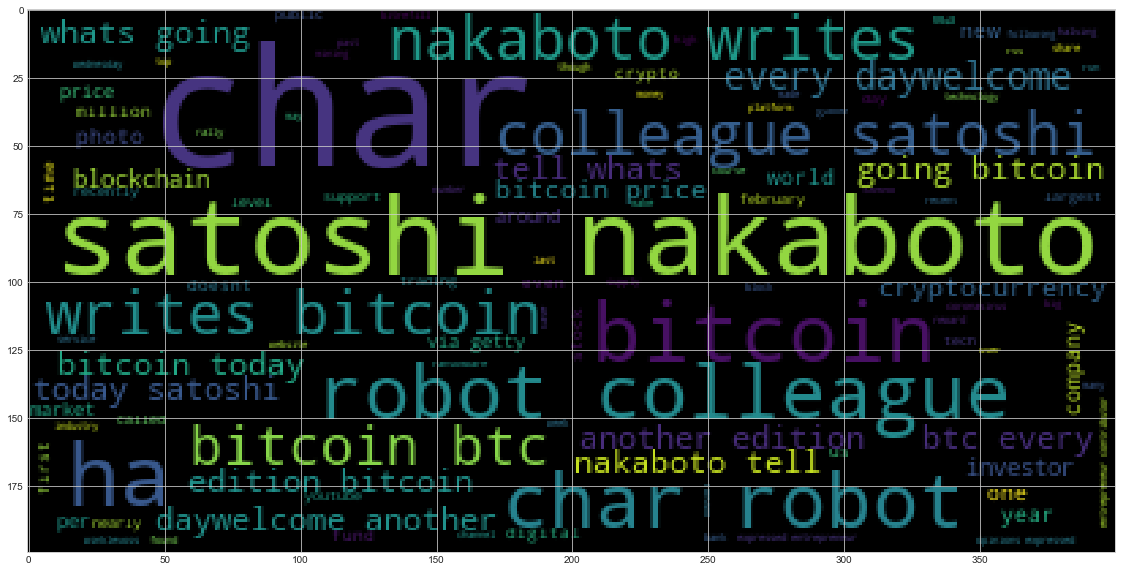

In [182]:
# Generate the Bitcoin word cloud
def process_text(doc):
    sw = set(stopwords.words('english')).union({'fucking'})
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

# Process text for wordcloud creation
bc_big_string = ' '.join(bitcoin_final_df.text)
input_text = process_text(big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

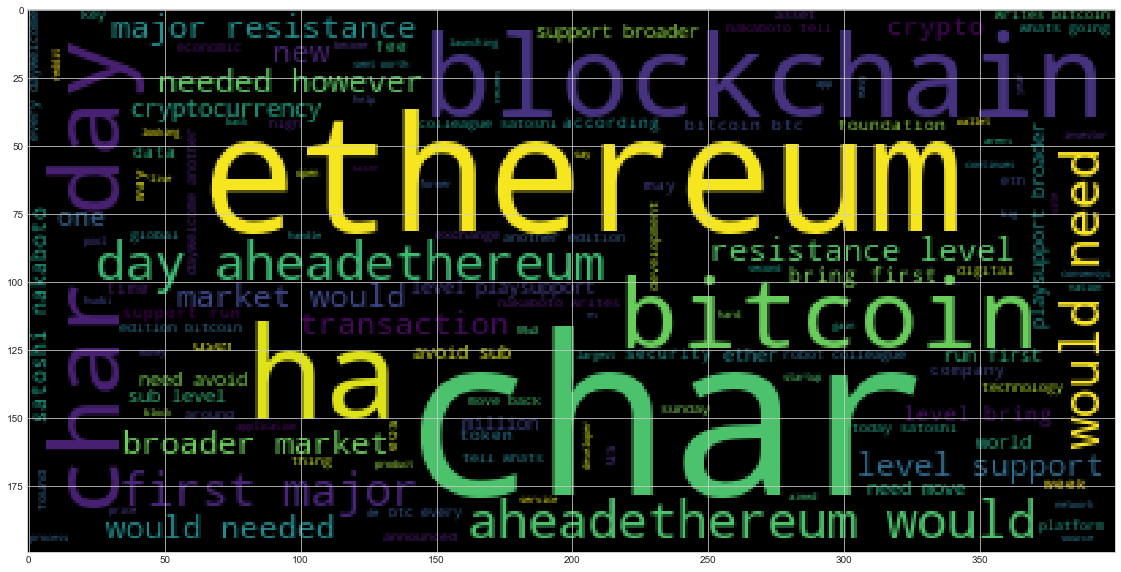

In [183]:
# Generate the Ethereum word cloud
eth_big_string = ' '.join(ethereum_final_df.text)
input_text = process_text(eth_big_string)
wc = WordCloud().generate(input_text)
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [192]:
import spacy
from spacy import displacy

In [189]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [190]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [194]:
# Concatenate all of the bitcoin text together
bc_doc=nlp(bc_big_string)
bc_doc

The Winklevoss twinsthe brothers Mark Zuckerberg allegedly stole the idea for Facebook fromare making a movie about themselves, Deadline reported this week. If that doesnt seem masturbatory enough, r… [+2657 chars] If youre planning to do some protesting and you dont want to risk your expensive smartphone in the processor you simply want to keep yourself as anonymous as possible while youre outconsider buying a… [+5568 chars] Reuters
<ul><li>Goldman Sachs gave five reasons why it thinks bitcoin is "not an asset class" nor "a suitable investment" in a presentation Wednesday morning.</li><li>Goldman observed that the crypt… [+3412 chars] <ul><li>Famed investor Michael Novogratz tweeted on Monday that bitcoin will soon take out the $10,000 resistance level, telling his followers, "Get on the train."</li><li>Novogratz said that turmoil… [+2757 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.
Welcome to another edition of Bitcoin Today, where I, Satosh

In [200]:
# Run the NER processor on all of the text
for ent in bc_doc.ents:
    print(ent.text, ent.label_)
# Add a title to the document
bc_doc.user_data["title"] = "Bidtcoin NER"

Mark Zuckerberg PERSON
Facebook ORG
Deadline PERSON
this week DATE
+2657 ORG
Reuters
 ORG
Goldman Sachs ORG
five CARDINAL
bitcoin GPE
Wednesday DATE
Goldman ORG
Michael Novogratz PERSON
Monday DATE
bitcoin GPE
$10,000 resistance MONEY
Novogratz PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
2020 DATE
a big year DATE
Bitcoin GPE
Bitcoin GPE
Bitcoin PERSON
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto P

In [201]:
# Render the visualization
displacy.render(bc_doc, style='ent')

In [202]:
# List all Entities
print([ent.text for ent in bc_doc.ents if ent.label_ == 'ORG'])


['Facebook', '+2657', 'Reuters\r\n', 'Goldman Sachs', 'Goldman', 'Satoshi', 'Andreessen Horowitzs', 'Crypto Startup School', 'Apple', 'Microsoft', 'Kitco News', 'the National Science Foundation', 'KRNC', 'QuadrigaCx', 'Polyient Labs', 'VPN', 'Hackintosh', 'Apple', 'TechFirst', 'Litecoin and Ethereum', 'Liverpool Crown C', '+2411', 'Privnotes.com', 'Privnote.com', 'Brit', 'Commercial Services Group', 'CSG', 'RSS', 'RSS', 'RSS', 'Slack Technologies Inc.', 'NYSE', 'Bitrefill Rewards Program', 'KrebsOnSecurity', '+1420', 'Pentagon', 'BTC/USD Price', 'HajricBitcoin', '+5599', '+3817', '+2603', 'Bloomberg | \r\n', 'Stampede Ventures', 'the Winklevoss Twins', 'JPMorgan', 'BTC', 'Getty Images', 'AFP', 'Getty Images\r\n', 'Samsung', 'Samsung', 'Blockchain Wallet', 'Getty Images', 'AFP', 'Getty Images\r\n', '+6587', 'Artur Widak/NurPhoto', 'Getty Images)\r\n', 'Getty Images\r\n']


---

## Ethereum NER

In [206]:
# Concatenate all of the bitcoin text together
eth_doc=nlp(eth_big_string)
eth_doc

Editor’s note:Andreessen HorowitzsCrypto Startup School brought together 45 participants from around the U.S. and overseas in a seven-week course to learn how to build crypto companies. Andreessen Ho… [+3009 chars] Our robot colleague Satoshi Nakaboto writes about Bitcoin BTC every fucking day.
Welcome to another edition of Bitcoin Today, where I, Satoshi Nakaboto, tell you whats been going on with Bitcoin in … [+3095 chars] For developers looking to quickly build identity management into their platforms, the most readily available options don’t stray far from the internet’s biggest, most data-hungry platforms.
Magic, a… [+2450 chars] Akron, Ohio, the hometown of LeBron James and the seat of the US tire industry; the one hundred and twenty seventh largest city in the US; and the home of America’s first toy company is now the lates… [+3647 chars] Some open-source groups, such as The Linux Foundation, can deal with it. Others aren't so fortunate. Some, such as Drupal Foundation, the Open

In [207]:
# Run the NER processor on all of the text
for ent in eth_doc.ents:
    print(ent.text, ent.label_)
# Add a title to the document
bc_doc.user_data["title"] = "Ethereum NER"

Andreessen HorowitzsCrypto Startup School ORG
45 CARDINAL
U.S. GPE
seven-week DATE
Andreessen Ho PERSON
+3009 ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Akron GPE
Ohio GPE
LeBron James PERSON
US GPE
the one hundred and twenty seventh DATE
US GPE
America GPE
first ORDINAL
The Linux Foundation ORG
Drupal Foundation ORG
OSI ORG
133 MONEY
$2.5 million MONEY
$2.5 million MONEY
Wednesday DATE
morning TIME
March DATE
1500 CARDINAL
well over a hundred CARDINAL
the Mozilla Builders Incubator ORG
more than £30,000 CARDINAL
Bitcoin GPE
Litecoin and Ethereum ORG
Mark Andrews PERSON
St Helens PERSON
England GPE
Liverpool Crown C ORG
+2411 ORG
Intel ORG
CrossTalk ORG
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin GPE
Satoshi Nakaboto PERSON
Bitcoin GPE
Bitcoin GPE
Today DATE
Satoshi Nakaboto PERSON
Bitcoin G

In [208]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [209]:
# List all Entities
print([ent.text for ent in eth_doc.ents if ent.label_ == 'ORG'])

['Andreessen HorowitzsCrypto Startup School', '+3009', 'The Linux Foundation', 'Drupal Foundation', 'OSI', 'the Mozilla Builders Incubator', 'Litecoin and Ethereum', 'Liverpool Crown C', '+2411', 'Intel', 'CrossTalk', 'Techmeme', 'Federal Reserve Board', 'SIM', 'The U.S. Patent and Trademark Office', 'Visa', 'The Ethereum Foundation', 'the United Nations Childrens Fund', 'UNICEF', 'UNICEF', 'OpenZeppelin', 'ag', 'Magic', 'CoinDesk’s Markets Daily Bitcoin', 'Eastern', 'CoinDesks First Mover', 'Renaissance', 'BTC', 'ConsenSys', 'ConsenSys', 'Binance', 'Matic Foundation', 'Community Points', 'the Commodity Futures Trading Commission', 'CFTC', 'Milken Institute Global Conference', 'CFTC', 'Apple', 'Numerai', 'NMR', 'Union Square Ventures', 'YurikoNakao/GettyImages\r\n', 'EOS', 'Nexus Mutual', 'DeFi', 'Ethereums', 'algorithm', 'the Electric Coin C', 'Block', 'the Ethereum Foundation', 'The World Economic Forum', 'WEF', 'the U.S. Securities and Exchange Commission', 'SEC', 'BTCKeychain/Flick